In [1]:
ls

PretrainedTrams.ipynb  tram2.jpg  tram.jpg


In [2]:
!chmod a-x *.jpg

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np

im = image.load_img('tram.jpg', target_size=(224, 224))  # PIL image
a = image.img_to_array(im)
a = a.reshape(1, 224, 224, 3)   # (No.datapoint, xsize, ysize, colors)
#                                 dense network requires matrix (1, 224*224*3)
#                                 MNIST 2D CNN (60000, 28, 28, 1)
b = preprocess_input(a) #??? scaling

In [4]:
a.shape, a.dtype

((1, 224, 224, 3), dtype('float32'))

In [5]:
im.size, im.mode

((224, 224), 'RGB')

In [6]:
assert (a == b).all()

In [7]:
from tensorflow.keras.applications import MobileNet

m = MobileNet(input_shape=(224, 224, 3))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

17227776/17225924 [==============================] - 1s 0us/step


In [8]:
p = m.predict(a)

In [9]:
from pprint import pprint
from tensorflow.keras.applications.mobilenet import decode_predictions

pprint(decode_predictions(p, 10))

40960/35363 [==================================] - 0s 1us/step
[[('n04335435', 'streetcar', 0.97131604),
  ('n04487081', 'trolleybus', 0.028574085),
  ('n03895866', 'passenger_car', 7.842033e-05),
  ('n03272562', 'electric_locomotive', 2.980306e-05),
  ('n03216828', 'dock', 8.433653e-07),
  ('n03769881', 'minibus', 4.3919601e-07),
  ('n03345487', 'fire_engine', 1.7102221e-07),
  ('n02704792', 'amphibian', 3.926472e-08),
  ('n03776460', 'mobile_home', 3.4719328e-08),
  ('n03947888', 'pirate', 3.455562e-08)]]


### Second example

In [10]:
im = image.load_img('tram2.jpg')  # PIL image

In [11]:
im.size

(3072, 2304)

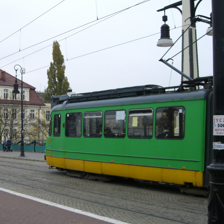

In [12]:
im2 = im.crop((1000, 0, 3000, 2000))  # xstart, ystart, xend, yend
im3 = im2.resize((224, 224))
im3

In [13]:
a = image.img_to_array(im3)
a = a.reshape(1, 224, 224, 3)
b = preprocess_input(a)
p = m.predict(a)
pprint(decode_predictions(p, 10))

[[('n04335435', 'streetcar', 0.9945281),
  ('n04487081', 'trolleybus', 0.0022241492),
  ('n03272562', 'electric_locomotive', 0.0019171245),
  ('n03895866', 'passenger_car', 0.0011752455),
  ('n03769881', 'minibus', 0.00013822818),
  ('n03670208', 'limousine', 1.0996015e-05),
  ('n02917067', 'bullet_train', 3.4074458e-06),
  ('n03776460', 'mobile_home', 6.949118e-07),
  ('n02704792', 'amphibian', 6.537338e-07),
  ('n04146614', 'school_bus', 4.7684443e-07)]]


### Teaser for Transfer Learning

In [14]:
m = MobileNet(input_shape=(224, 224, 3), include_top=False)
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

17227776/17225924 [==============================] - 1s 0us/step


In [15]:
p = m.predict(a)
p.shape   # last output of the CNN layers --> internal features of the image

(1, 7, 7, 1024)

In [16]:
# --> we can retrain the network with this, using transfer learning (Monday)